<a href="https://colab.research.google.com/github/JonathanZ837/food_detection/blob/main/finalprojectworking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load and preprocess the data


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

#change depending on where your dataset is (mines is in google drive)
train_dir = "/content/drive/MyDrive/food5kdataset/training"
test_dir = "/content/drive/MyDrive/food5kdataset/evaluation"


classes = ["non_food", "food"]

img_size = (224, 224)

# preprocess all the training data so that everything is normalized
train_data = []
train_labels = []

for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img)
        img = img / 255.0  
        train_data.append(img)
        label = classes.index(class_name)
        train_labels.append(label)

train_data = np.array(train_data)
train_labels = to_categorical(train_labels)


#do the same thing here but for the test data
test_data = []
test_labels = []

for class_name in classes:
    class_dir = os.path.join(test_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img)
        img = img / 255.0  
        test_data.append(img)
        label = classes.index(class_name)
        test_labels.append(label)

test_data = np.array(test_data)
test_labels = to_categorical(test_labels)

Creating the model and testing it 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# create the model
# 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=train_data.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(len(classes), activation="softmax"))

# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# train model
model.fit(train_data, train_labels, epochs=10, batch_size=64)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
47/47 [==============================] - 19s 120ms/step - loss: 0.6388 - accuracy: 0.6837
Epoch 2/10
47/47 [==============================] - 4s 91ms/step - loss: 0.4082 - accuracy: 0.8230
Epoch 3/10
47/47 [==============================] - 4s 95ms/step - loss: 0.3271 - accuracy: 0.8627
Epoch 4/10
47/47 [==============================] - 4s 89ms/step - loss: 0.2629 - accuracy: 0.8910
Epoch 5/10
47/47 [==============================] - 4s 89ms/step - loss: 0.2045 - accuracy: 0.9207
Epoch 6/10
47/47 [==============================] - 5s 97ms/step - loss: 0.1586 - accuracy: 0.9403
Epoch 7/10
47/47 [==============================] - 4s 88ms/step - loss: 0.1275 - accuracy: 0.9527
Epoch 8/10
47/47 [==============================] - 4s 89ms/step - loss: 0.1057 - accuracy: 0.9597
Epoch 9/10
47/47 [==============================] - 5s 98ms/step - loss: 0.0651 - accuracy: 0.9790
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 0.5719 - accuracy: 0.8680
Test ac

Test on new input image based on url

1/1 [==============================] - 0s 49ms/step


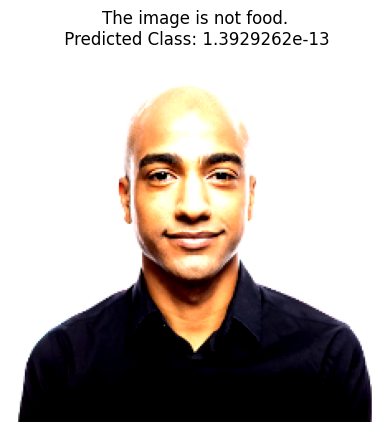

In [ ]:
import numpy as np
import urllib
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#conert image from url for to a numpy array
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
    return image

# preprocess our input image
def preprocess_image(img):
    img = tf.image.adjust_brightness(img, delta=0.25)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img


image_url = "https://media.istockphoto.com/id/805012064/photo/portrait-of-mature-hispanic-man.jpg?b=1&s=170667a&w=0&k=20&c=_R8OKYH8iE1AhCBBI9VkeZ3ZE-FN0NcKVRDNudyuZ9k="

# load the image from the URL
image = url_to_image(image_url)

# preprocess the image
image = preprocess_image(image)


# predict whether the image is food or not
prediction = model.predict(image)


result = ""
# check if the probability of the "food" class is greater than 0.5
if prediction[0][1] > 0.5:
    result = "The image is food."
else:
    result = "The image is not food."

plt.imshow(image[0])
plt.title(result + "\n Predicted Class: " +  str(prediction[0][1]))
plt.axis("off")
plt.show()
